In [1]:
# 데이터 로드
df <- read.csv('./rggagi/example_studentlist.csv')

In [3]:
head(df)

str(df)

,name,sex,age,grade,absence,bloodtype,height,weight
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,김길동,남자,23,3,유,O,165.3,68.2
2,이미린,여자,22,2,무,AB,170.1,53.0
3,홍길동,남자,24,4,무,B,175.0,80.1
4,김철수,남자,23,3,무,AB,182.1,85.7
5,손세수,여자,20,1,유,A,168.0,49.5
6,박미희,여자,21,2,무,O,162.0,52.0


'data.frame':	17 obs. of  8 variables:
 $ name     : chr  "김길동" "이미린" "홍길동" "김철수" ...
 $ sex      : chr  "남자" "여자" "남자" "남자" ...
 $ age      : int  23 22 24 23 20 21 22 23 23 22 ...
 $ grade    : int  3 2 4 3 1 2 1 1 3 2 ...
 $ absence  : chr  "유" "무" "무" "무" ...
 $ bloodtype: chr  "O" "AB" "B" "AB" ...
 $ height   : num  165 170 175 182 168 ...
 $ weight   : num  68.2 53 80.1 85.7 49.5 52 45.3 55 64.2 61.3 ...


In [4]:
df

name,sex,age,grade,absence,bloodtype,height,weight
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
김길동,남자,23,3,유,O,165.3,68.2
이미린,여자,22,2,무,AB,170.1,53.0
홍길동,남자,24,4,무,B,175.0,80.1
김철수,남자,23,3,무,AB,182.1,85.7
손세수,여자,20,1,유,A,168.0,49.5
박미희,여자,21,2,무,O,162.0,52.0
강수친,여자,22,1,무,O,155.2,45.3
이희수,여자,23,1,무,A,176.9,55.0
이철린,남자,23,3,무,B,178.5,64.2


In [6]:
# 평균 구하기 - NA 제거 후
mean(df$height, na.rm = T) # na 없는 정보를 rm 제거  T 함

[1] 170.0353

In [7]:
# 중앙갑 구하기
median(df$height, na.rm = T)

[1] 169.2

In [8]:
# 범위 구하기
range(df$height, na.rm = T)

[1] 155.2 182.1

In [9]:
# 사분위 구하기
quantile(df$height, na.rm = T)

0%   25%   50%   75%  100% 
155.2 165.3 169.2 176.1 182.1

In [10]:
#IQR 구하기
IQR(df$height, na.rm = T)

[1] 10.8

In [11]:
# 참고 IRQ를 구하는 알고리즘은 여러개임
IQR(df$height, na.rm = T, type = 7) # default
IQR(df$height, na.rm = T, type = 5)
IQR(df$height, na.rm = T, type = 3)

[1] 10.8

[1] 11.775

[1] 13.9

In [12]:
# 평균, 중앙값, Q1, Q3 한번에 보기
summary(df$height, na.rm = T)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  155.2   165.3   169.2   170.0   176.1   182.1 

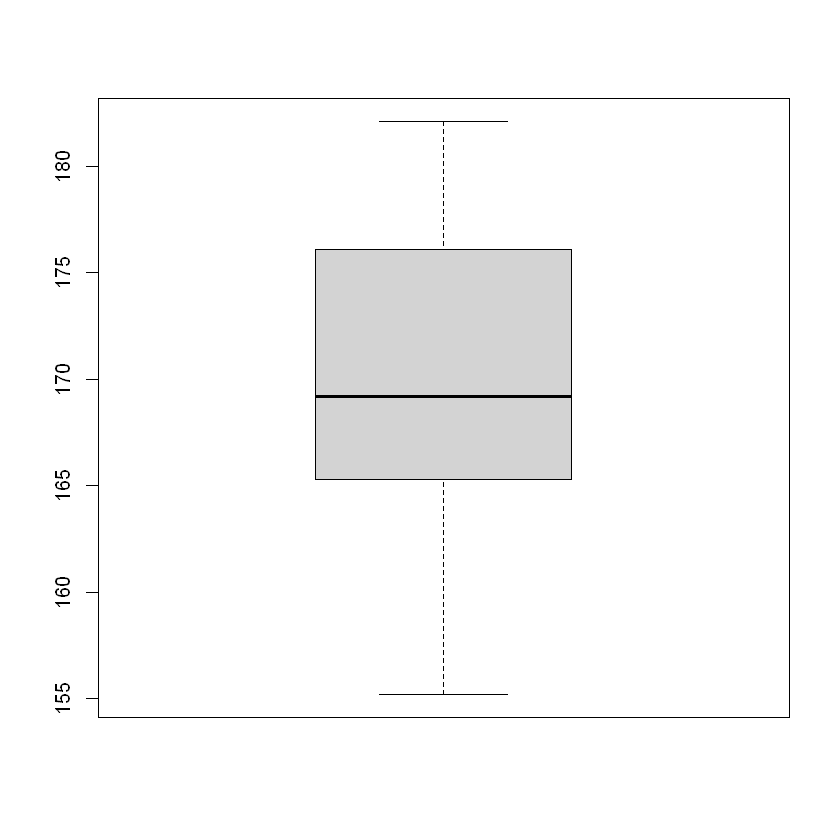

In [13]:
# Box Plot 으로 보기 - NA 값 기본 제거함
boxplot(df$height)

위의 box plot을 보면, 중앙값 대비 조금 위에 치우쳐 있는 것을 확인 할수 있다. 

In [14]:
# 상관계수 다루기
cor(df$height, df$weight)

[1] 0.6641816

In [15]:
# 좀더 자세한 상관 관계
# 신뢰구간, P값등이 나옴
cor.test(df$height, df$weight)


	Pearson's product-moment correlation

data:  df$height and df$weight
t = 3.441, df = 15, p-value = 0.003639
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2696040 0.8677954
sample estimates:
      cor 
0.6641816 


In [16]:
# 3개변수 상관 계수
cor(df[,c(3,7,8)])

,age,height,weight
age,1.0000000,0.3450992,0.5226855
height,0.3450992,1.0000000,0.6641816
weight,0.5226855,0.6641816,1.0000000


In [17]:
# 여러 변수 사용시의 결측치 
# use 사용 좀더 자세히 지정해야 함
df2 <- df
df2[2,7] <- NA
df2[4,8] <- NA

In [18]:
cor(df2$height, df2$weight)


[1] NA

In [19]:
# na.rm = T 사용 못함
cor(df2$height, df2$weight, na.rm = T)

ERROR: Error in cor(df2$height, df2$weight, na.rm = T): 사용되지 않은 인자 (na.rm = T)


In [20]:
# use = 'complete.obs' == na.rm = T 모든 결측치 제거
cor(df2$height, df2$weight, use = 'complete.obs')


[1] 0.5966809

In [21]:
# use = 'pairwise.complete.obs' 상관계수를 만든 Peason 방식, 그 Vector 만 뺌
cor(df2$height, df2$weight, use = 'pairwise.complete.obs')

[1] 0.5966809

In [22]:
# use = 'everything' == na.rm = F Na 값 포함해서 처리
cor(df2$height, df2$weight, use = 'everything')

[1] NA

In [23]:
# use = 'all.obs' 계산 자체를 안함
cor(df2$height, df2$weight, use = 'all.obs')

ERROR: Error in cor(df2$height, df2$weight, use = "all.obs"): cov/cor에 결측치들이 있습니다


In [24]:
# 분산과 공분산 구하기
var(df$height, na.rm = T)

[1] 61.61868

In [25]:
var(df$height, df$weight, na.rm = T)

[1] 61.7907

In [26]:
cov(df$height, df$weight, use = 'complete.obs')


[1] 61.7907

In [27]:
cov(df[,c(3,7,8)], use = 'complete.obs')


,age,height,weight
age,1.367647,3.168015,7.244485
height,3.168015,61.618676,61.790699
weight,7.244485,61.790699,140.462426


In [28]:
# 표준편차
sd(df$height, na.rm = T)

[1] 7.849756

In [29]:
scale(df$height)


-0.603240896
0.008243043
0.632466231
1.536952891
-0.259281180
-1.023636104
-1.889905017
0.874511957
1.078339937
0.772597967
-0.373934419


In [30]:
# 표준화
df_scale <- data.frame(df$height,
                       scale(df$height),
                       z_score=(df$height-mean(df$height))/sd(df$height, na.rm = T)
                       )
df_scale

df.height,scale.df.height.,z_score
<dbl>,<dbl>,<dbl>
165.3,-0.603240896,-0.603240896
170.1,0.008243043,0.008243043
175.0,0.632466231,0.632466231
182.1,1.536952891,1.536952891
168.0,-0.259281180,-0.259281180
162.0,-1.023636104,-1.023636104
155.2,-1.889905017,-1.889905017
176.9,0.874511957,0.874511957
178.5,1.078339937,1.078339937


In [31]:
# 변동계수 - height
sd(df$height) / mean(df$height)

[1] 0.04616545

In [33]:
# 변동계수 - weight - height 보다 더 많이 분산되어 있음
sd(df$weight) / mean(df$weight)

[1] 0.194084